# Data Science Project - Featurizing + Navie Bayes Classification Model


**Members:** Minji, Nathan, Franco, Gabriel, Humphrey

### **Goal:**
Cleaning and engineering the dataset containing Credit Card Fraud information, we'll test different binary classification models to see which performs best to aid existing fraudulent detection systems at commercial banks.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 654.7 kB/s eta 0:00:00


In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [ ]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/fraud test.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## **Data Cleaning**

In [ ]:
clean_df = df.drop(['Unnamed: 0',                # indexing
         'trans_date_trans_time'      # not really a factor for fraud charges
         # 'first', 'last'              # personal info shouldn't matter // keep demographic for insights
         ], axis = 1)

In [ ]:
# convert dob into year born, the m/d doesn't matter - just wanna see what age ranges are most affected
clean_df['dob'] = clean_df['dob'].str[-4:]

In [ ]:
clean_df['full_name'] = clean_df['first'] + " " + clean_df['last']
clean_df.drop(['first', 'last'], axis = 1)

print(clean_df['full_name'].nunique(), '\n\n', clean_df['full_name'].unique())

917 

 ['Jeff Elliott' 'Joanne Williams' 'Ashley Lopez' 'Brian Williams'
 'Nathan Massey' 'Danielle Evans' 'Kayla Sutton' 'Paula Estrada'
 'David Everett' 'Kayla Obrien' 'Samuel Jenkins' 'Louis Fisher'
 'Melissa Meza' 'William Thompson' 'Ashley Whitney' 'Christine Leblanc'
 'Charles Moreno' 'Lauren Torres' 'Ashley Cruz' 'Gina Grimes'
 'Shannon Williams' 'Stacy Villegas' 'Christopher Johnson'
 'Rebecca Conley' 'Kristen Hanson' 'Terri Bailey' 'William Johnson'
 'Cody Hooper' 'Kathleen Martin' 'Mary Schmidt' 'Frank Key' 'Mary Wall'
 'Daniel Cain' 'Mackenzie Salazar' 'Krystal Gamble' 'James Reese'
 'Charles Carrillo' 'Jessica Dominguez' 'Samuel Johnston' 'Zachary Allen'
 'Jenna Brooks' 'Andrew Mcgee' 'David Wolfe' 'Jessica Garcia' 'Dale Smith'
 'Lisa Lin' 'Jeffrey White' 'Sandra Schwartz' 'Amanda Spencer'
 'Jackie Davis' 'Joshua Cohen' 'Audrey Gonzalez' 'Kathryn Smith'
 'Bridget Bowen' 'Jeremy Roberson' 'Mary Myers' 'Melissa Brown'
 'Angie Jones' 'Judy Hogan' 'Jessica Perez' 'Adam Santos' 

So the 16,316 rows are instances of 903 different customers' credit card fraud instances

In [ ]:
# count occurrences of each full name
name_counts = clean_df['full_name'].value_counts()
print(name_counts.head(10))   # 10 common

full_name
Scott Martin         1965
Jeffrey Smith        1526
Gina Grimes          1474
Michelle Gregory     1466
Carrie Washington    1462
Amber Lewis          1458
Samuel Jenkins       1428
Andrew Patterson     1426
Lori Ramirez         1403
Lisa Lin             1386
Name: count, dtype: int64


Dropping the 1 NA entry I spotted below

In [ ]:
clean_df.dropna()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,-80.9355,333497,Mechanical engineer,1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Jeff Elliott
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,-110.4360,302,"Sales professional, IT",1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Joanne Williams
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,-73.5365,34496,"Librarian, public",1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,Ashley Lopez
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,-80.8191,54767,Set designer,1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,Brian Williams
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,-85.0170,1126,Furniture designer,1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,Nathan Massey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,-91.8912,519,Town planner,1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Michael Olson
555715,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,-95.4401,28739,Futures trader,1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez
555716,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,-118.9017,3684,Musician,1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson
555717,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,-116.4493,129,Cartographer,1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Eric Preston


## **Split the df into Fraud and Non-Fraud**

In [ ]:
# fraudulent charges
fraud_df = clean_df[(clean_df['is_fraud'] == 1)]
fraud_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
1685,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,TX,...,-102.7413,23,Cytogeneticist,1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,Brooke Smith
1767,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,...,-90.3508,1306,Public relations officer,1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,Douglas Willis
1781,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,...,-90.3508,1306,Public relations officer,1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,Douglas Willis
1784,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,LA,...,-90.9027,71335,Herbalist,1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,William Perry
1857,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,TX,...,-102.7413,23,Cytogeneticist,1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,Brooke Smith


In [ ]:
# non-fraudulent charges
real_df = df[(df['is_fraud'] == 0)]
real_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# downsampling - match the other side
real_sample = real_df.sample(n = 7855, random_state = 42)
print(real_sample['is_fraud'].value_counts)

<bound method IndexOpsMixin.value_counts of 547885    0
528140    0
129300    0
354681    0
182576    0
         ..
416999    0
151032    0
242352    0
340116    0
482952    0
Name: is_fraud, Length: 7855, dtype: int64>


Now the sampling of the dataset is the same for both classifications

Combine the two for **balanced_df**

In [ ]:
# combining
balanced_df = pd.concat([fraud_df, real_sample]).sample(frac = 1, random_state = 42).reset_index(drop = True)
balanced_counts = balanced_df['is_fraud'].value_counts().sort_index()

# plot new
labels = ['Non-Fraud', 'Fraud']
values = [balanced_counts[0], balanced_counts[1]]

In [ ]:
def extract_year(x):
    x = str(x).strip()
    if x.isdigit() and len(x) == 4:
        # It's just a year, return as int
        return int(x)
    else:
        # Try parsing full date and get the year
        try:
            return pd.to_datetime(x, errors='coerce').year
        except:
            return None  # or np.nan if you prefer

In [ ]:
balanced_df['dob'] = balanced_df['dob'].apply(extract_year)

/tmp/ipython-input-3575405230.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(x, errors='coerce').year


### **Numeric Data**

In [ ]:
# split numeric / categorical data columns
num_cols = balanced_df.select_dtypes(include=['float64', 'int64']).columns.drop(['is_fraud'])
cat_cols = balanced_df.select_dtypes(include='object').columns

## **Featurizing - on original cleaned_df**

This will overfit - toward non-fraud charges

- cc num & transaction num isn't helpful to the prediction --> drop?


**Target Encoding**

- merchant, category, job

**Frequency Encode**

- full name, zipcode

**Scale**
- amt, lat, long, merch lat, merch long, city pop (or put into bins)

*Unix Time*

use to extract
- Hour of day (.dt.hour)

- Day of week (.dt.dayofweek)

- Day/Night flag

- Weekend flag

Fraud patterns often have time-of-day and weekday correlations.


In [ ]:
# copy and keep only rows with known target for fitting encoders/scaler
model_df = clean_df.dropna(subset=['is_fraud']).copy()

In [ ]:
# drop IDs / low-signal identifiers
model_df = model_df.drop(columns=['cc_num', 'trans_num'], errors='ignore')

In [ ]:
# frequency encode (full_name, zip)
for col in ['full_name', 'zip']:
    counts = model_df[col].astype('object').value_counts()
    model_df[f'{col}_freq'] = model_df[col].map(counts).fillna(0)

In [ ]:
# target encode (merchant, category, job) – avoid leakage by fitting on train only in practice
te_cols = ['merchant', 'category', 'job']
te = ce.TargetEncoder(cols=te_cols, smoothing=10)
te_df = te.fit_transform(model_df[te_cols], model_df['is_fraud'])
te_df.columns = [c + '_te' for c in te_df.columns]
model_df = pd.concat([model_df.drop(columns=te_cols), te_df], axis=1)

In [ ]:
# unix_time -> time features
tx_dt = pd.to_datetime(model_df['unix_time'], unit='s', errors='coerce')
model_df['hour']       = tx_dt.dt.hour
model_df['dow']        = tx_dt.dt.dayofweek
model_df['is_night']   = ((model_df['hour'] < 6) | (model_df['hour'] >= 18)).astype('Int64')
model_df['is_weekend'] = (model_df['dow'] >= 5).astype('Int64')

In [ ]:
#age from birth year (dob is a YEAR, e.g., 1969)
#    age = transaction_year - dob_year
model_df['tx_year'] = tx_dt.dt.year
model_df['dob'] = pd.to_numeric(model_df['dob'], errors='coerce')
model_df['age'] = (model_df['tx_year'] - model_df['dob']).clip(lower=0)

In [ ]:
# scale numeric features
num_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
# simple median impute for numeric NaNs before scaling
for c in num_cols:
    if c in model_df.columns:
        model_df[c] = model_df[c].fillna(model_df[c].median())

scaler = StandardScaler()
scaled = scaler.fit_transform(model_df[num_cols])
model_df[[c + '_sc' for c in num_cols]] = scaled

In [ ]:
model_df.head()

,amt,first,last,gender,street,city,state,zip,lat,long,...,is_night,is_weekend,tx_year,age,amt_sc,lat_sc,long_sc,merch_lat_sc,merch_long_sc,city_pop_sc
0,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,...,0,0,2013,45,-0.424463,-0.904377,0.677451,-0.894145,0.657586,0.816521
1,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,...,0,0,2013,23,-0.252337,0.351182,-1.472454,0.178126,-1.436610,-0.292685
2,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,...,0,0,2013,43,-0.179353,0.420768,1.216667,0.383257,1.167640,-0.178853
3,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,...,0,0,2013,26,-0.059605,-1.970539,0.685934,-1.909485,0.680717,-0.111371
4,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,...,0,0,2013,58,-0.422358,1.128092,0.380004,1.259139,0.316510,-0.289942


In [ ]:
#model_df.to_csv('fucked_fraud_data.csv', index=False)

## **Featurizing the cleaned + balanced data**

In [ ]:
# copy and keep only rows with known target for fitting encoders/scaler
balanced_model_df = balanced_df.dropna(subset=['is_fraud']).copy()

In [ ]:
# drop IDs / low-signal identifiers
balanced_model_df = balanced_model_df.drop(columns=['cc_num', 'trans_num'], errors='ignore')

In [ ]:
# frequency encode (full_name, zip)
for col in ['full_name', 'zip']:
    counts = balanced_model_df[col].astype('object').value_counts()
    balanced_model_df[f'{col}_freq'] = balanced_model_df[col].map(counts).fillna(0)

In [ ]:
# target encode (merchant, category, job) – avoid leakage by fitting on train only in practice
te_cols = ['merchant', 'category', 'job']
te = ce.TargetEncoder(cols=te_cols, smoothing=10)
te_df = te.fit_transform(balanced_model_df[te_cols], balanced_model_df['is_fraud'])
te_df.columns = [c + '_te' for c in te_df.columns]
#balanced_model_df = pd.concat([balanced_model_df.drop(columns=te_cols), te_df], axis=1)
balanced_model_df = pd.concat([balanced_model_df, te_df], axis=1)

In [ ]:
# unix_time -> time features
tx_dt = pd.to_datetime(balanced_model_df['unix_time'], unit='s', errors='coerce')
balanced_model_df['hour']       = tx_dt.dt.hour
balanced_model_df['dow']        = tx_dt.dt.dayofweek
balanced_model_df['is_night']   = ((balanced_model_df['hour'] < 6) | (balanced_model_df['hour'] >= 18)).astype('Int64')
balanced_model_df['is_weekend'] = (balanced_model_df['dow'] >= 5).astype('Int64')

In [ ]:
#age from birth year (dob is a YEAR, e.g., 1969)
#    age = transaction_year - dob_year
balanced_model_df['tx_year'] = tx_dt.dt.year

balanced_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   merchant               10000 non-null  object 
 1   category               10000 non-null  object 
 2   amt                    10000 non-null  float64
 3   first                  10000 non-null  object 
 4   last                   10000 non-null  object 
 5   gender                 10000 non-null  object 
 6   street                 10000 non-null  object 
 7   city                   10000 non-null  object 
 8   state                  10000 non-null  object 
 9   zip                    10000 non-null  int64  
 10  lat                    10000 non-null  float64
 11  long                   10000 non-null  float64
 12  city_pop               10000 non-null  int64  
 13  job                    10000 non-null  object 
 14  dob                    10000 non-null  int64  
 15  uni

In [ ]:
balanced_model_df['age'] = (balanced_model_df['tx_year'] - balanced_model_df['dob']).clip(lower=0)
balanced_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   merchant               10000 non-null  object 
 1   category               10000 non-null  object 
 2   amt                    10000 non-null  float64
 3   first                  10000 non-null  object 
 4   last                   10000 non-null  object 
 5   gender                 10000 non-null  object 
 6   street                 10000 non-null  object 
 7   city                   10000 non-null  object 
 8   state                  10000 non-null  object 
 9   zip                    10000 non-null  int64  
 10  lat                    10000 non-null  float64
 11  long                   10000 non-null  float64
 12  city_pop               10000 non-null  int64  
 13  job                    10000 non-null  object 
 14  dob                    10000 non-null  int64  
 15  uni

In [ ]:
# scale numeric features
num_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
# simple median impute for numeric NaNs before scaling
for c in num_cols:
    if c in balanced_model_df.columns:
        balanced_model_df[c] = balanced_model_df[c].fillna(balanced_model_df[c].median())

scaler = StandardScaler()
scaled = scaler.fit_transform(balanced_model_df[num_cols])
balanced_model_df[[c + '_sc' for c in num_cols]] = scaled
balanced_model_df['state_city'] = balanced_model_df['state']+' '+balanced_model_df['city']

In [ ]:
balanced_model_df.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,...,is_weekend,tx_year,age,amt_sc,lat_sc,long_sc,merch_lat_sc,merch_long_sc,city_pop_sc,state_city
0,"fraud_Jenkins, Hauck and Friesen",gas_transport,75.79,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,53803,...,0,2013,55,-0.307391,0.779910,-0.003829,0.966438,-0.070487,-0.291783,WI Benton
1,fraud_Schuppe LLC,entertainment,81.57,Joseph,Davis,M,941 Adam Stravenue,Nazareth,TX,79063,...,0,2013,33,-0.287654,-0.804722,-0.858005,-0.864306,-0.807902,-0.294147,TX Nazareth
2,fraud_Lockman Ltd,grocery_pos,311.92,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,VA,22719,...,0,2013,31,0.498904,-0.020310,0.874390,0.078205,0.817791,-0.295257,VA Etlan
3,fraud_Johns Inc,entertainment,8.21,John,Davis,M,9670 Monroe Junctions,Rockwood,PA,15557,...,0,2013,37,-0.538151,0.262151,0.807348,0.351714,0.777832,-0.282717,PA Rockwood
4,fraud_Frami Group,entertainment,2.32,Mary,Juarez,F,35440 Ryan Islands,North Prairie,WI,53153,...,1,2013,71,-0.558263,0.855876,0.138276,0.866739,0.136087,-0.287887,WI North Prairie


In [ ]:
def analyze_categorical_association(data, categorical_var1, dependent_variable):
    """
    Analyze association between two categorical variables:
    It prints Chi-square test results for significance of association
    It prints Cramer's V for strength of relationship
    Plots heatmap of counts
    Parameters:
        data
        categorical_var1 (str): name of the first categorical variable (y-axis)
        dependent_variable (str): name of the second categorical variable (x-axis)
    """
    # Create crosstab
    ctab = pd.crosstab(data[categorical_var1], data[dependent_variable])

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(ctab)
    print(f"Chi-square: {chi2:.3f}, p-value: {p:.3e}")

    # Cramer's V calculation
    n = ctab.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(ctab.shape) - 1)))
    print(f"Cramér's V: {cramers_v:.3f}")

    # Plot heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Crosstab Heatmap (Counts) of {categorical_var1} vs {dependent_variable}')
    plt.xlabel(dependent_variable)
    plt.ylabel(categorical_var1)
    plt.show()

Chi-square: 0.025, p-value: 8.741e-01
Cramér's V: 0.002


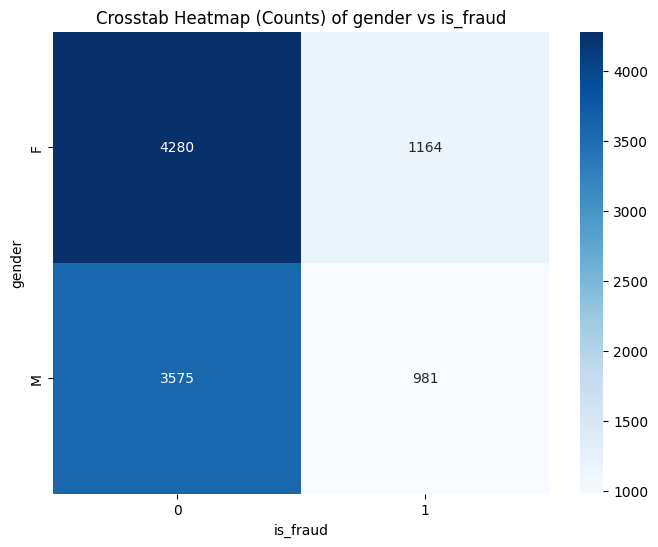

In [ ]:
analyze_categorical_association(balanced_model_df,'gender','is_fraud')

Chi-square: 354.458, p-value: 6.791e-48
Cramér's V: 0.188


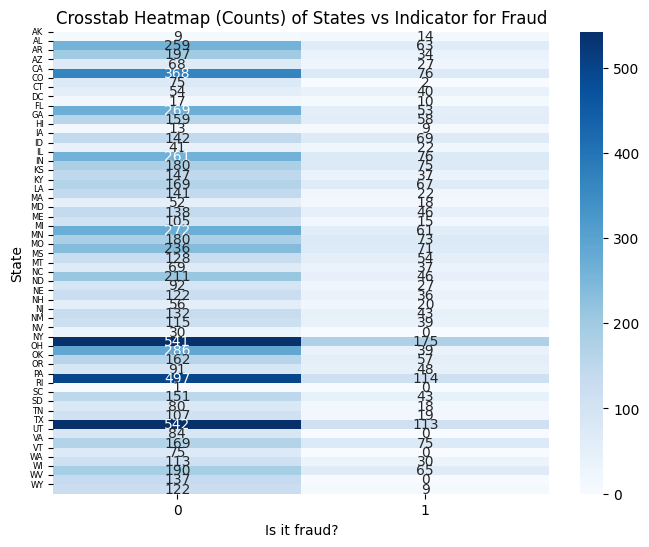

In [ ]:
# Create crosstab
ctab = pd.crosstab(balanced_model_df['state'], balanced_model_df['is_fraud'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)
print(f"Chi-square: {chi2:.3f}, p-value: {p:.3e}")

# Cramer's V calculation
n = ctab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ctab.shape) - 1)))
print(f"Cramér's V: {cramers_v:.3f}")

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab Heatmap (Counts) of States vs Indicator for Fraud')
plt.xlabel('Is it fraud?')
plt.ylabel('State')
plt.yticks(ticks=range(len(ctab.index)), labels=ctab.index, fontsize=6)
plt.show()

Chi-square: 5038.327, p-value: 0.000e+00
Cramér's V: 0.710


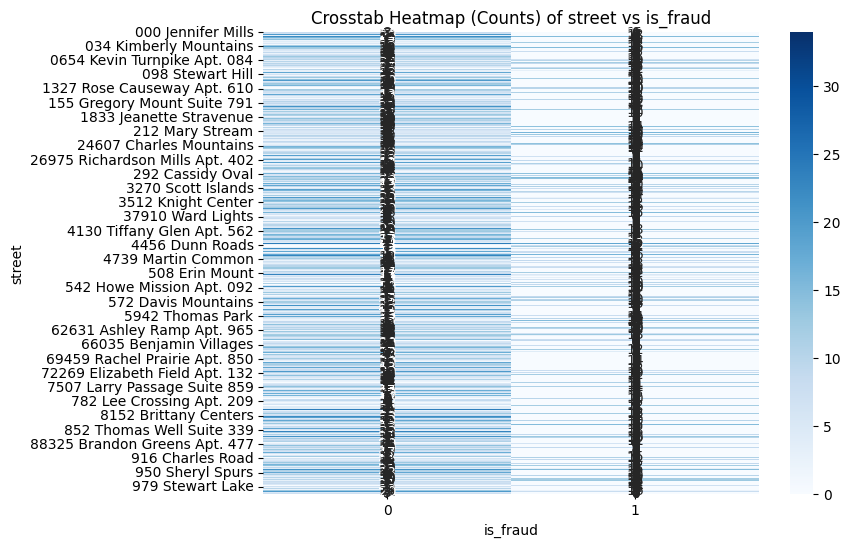

Chi-square: 4685.902, p-value: 0.000e+00
Cramér's V: 0.685


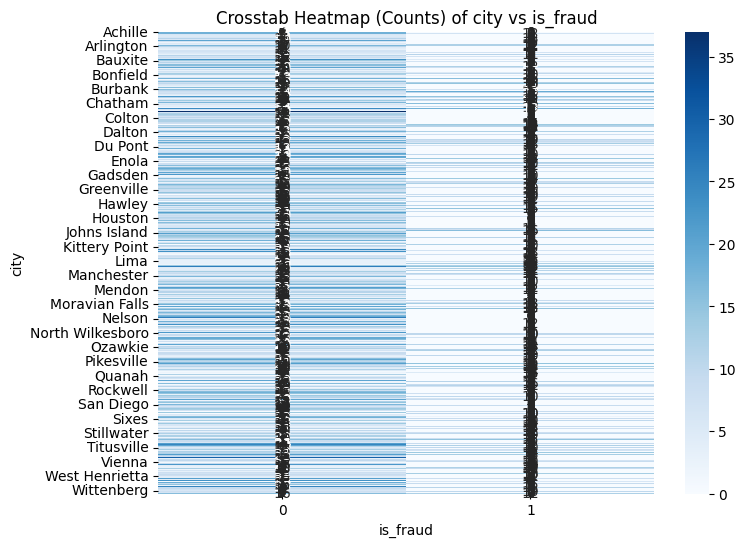

Chi-square: 354.458, p-value: 6.791e-48
Cramér's V: 0.188


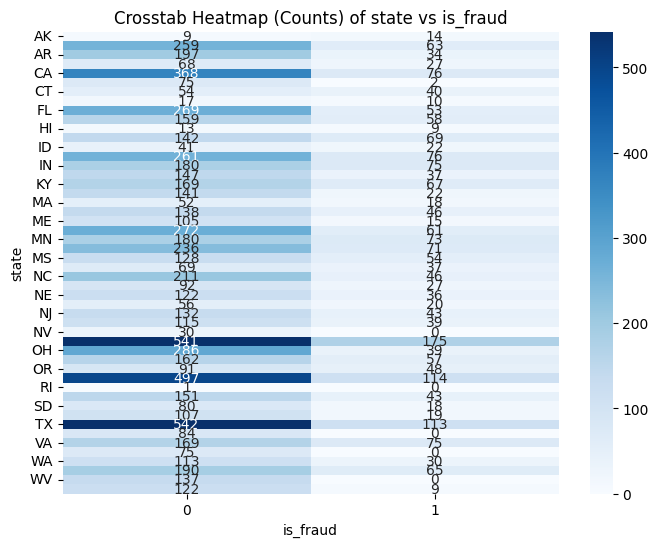

In [ ]:
analyze_categorical_association(balanced_model_df,'street','is_fraud')
analyze_categorical_association(balanced_model_df,'city','is_fraud')
analyze_categorical_association(balanced_model_df,'state','is_fraud')


Chi-square: 4800.777, p-value: 0.000e+00
Cramér's V: 0.693


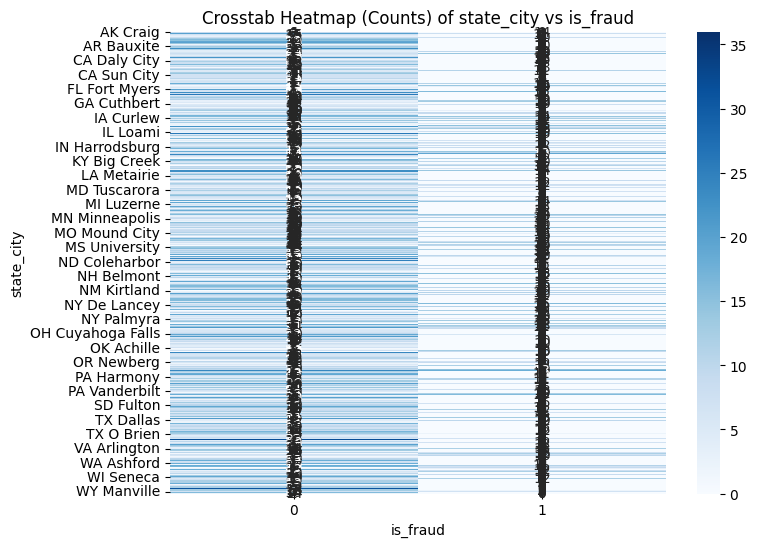

In [ ]:

analyze_categorical_association(balanced_model_df,'state_city','is_fraud')

Chi-square: 5000.991, p-value: 0.000e+00
Cramér's V: 0.707


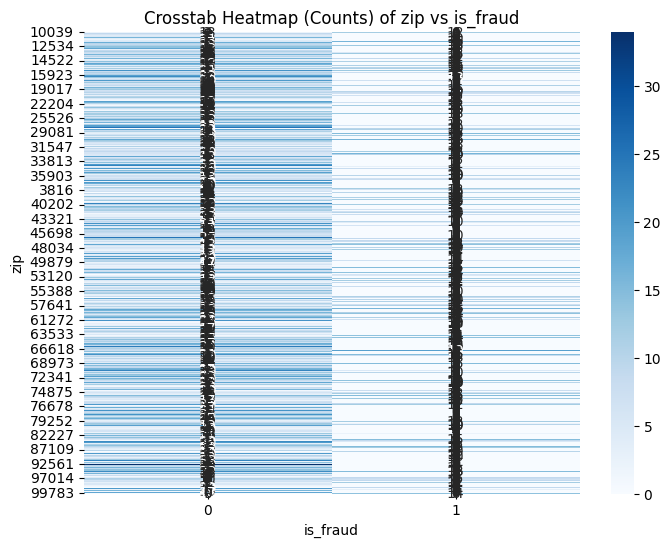

In [ ]:
balanced_model_df['zip'] = balanced_model_df['zip'].astype(str)
analyze_categorical_association(balanced_model_df,'zip','is_fraud')

Chi-square: 2818.627, p-value: 0.000e+00
Cramér's V: 0.531


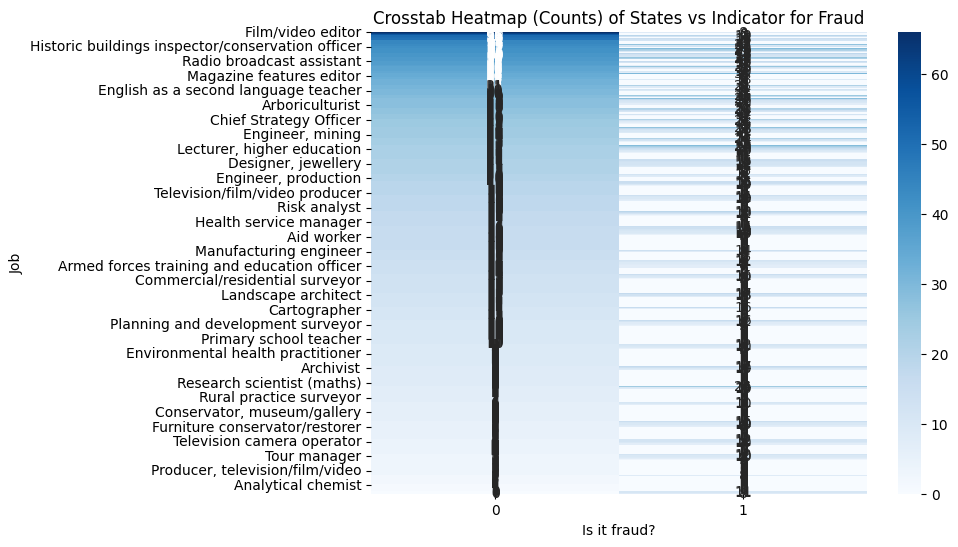

In [ ]:
# Create crosstab
ctab = pd.crosstab(balanced_model_df['job'], balanced_model_df['is_fraud'])
ctab.sort_values(by=[0,1],ascending=False)

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)
print(f"Chi-square: {chi2:.3f}, p-value: {p:.3e}")

# Cramer's V calculation
n = ctab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ctab.shape) - 1)))
print(f"Cramér's V: {cramers_v:.3f}")

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(ctab.sort_values(by=[0,1],ascending=False), annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab Heatmap (Counts) of States vs Indicator for Fraud')
plt.xlabel('Is it fraud?')
plt.ylabel('Job')
#plt.yticks(ticks=range(len(ctab.index)), labels=ctab.index, fontsize=6)
plt.show()

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
# %matplotlib inline
import matplotlib_inline
import numpy as np

In [ ]:
# We will ignore some silly warnings that pop up due to scikit-learn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
balanced_model_df

,merchant,category,amt,first,last,gender,street,city,state,zip,...,is_weekend,tx_year,age,amt_sc,lat_sc,long_sc,merch_lat_sc,merch_long_sc,city_pop_sc,state_city
0,"fraud_Jenkins, Hauck and Friesen",gas_transport,75.79,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,53803,...,0,2013,55,-0.307391,0.779910,-0.003829,0.966438,-0.070487,-0.291783,WI Benton
1,fraud_Schuppe LLC,entertainment,81.57,Joseph,Davis,M,941 Adam Stravenue,Nazareth,TX,79063,...,0,2013,33,-0.287654,-0.804722,-0.858005,-0.864306,-0.807902,-0.294147,TX Nazareth
2,fraud_Lockman Ltd,grocery_pos,311.92,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,VA,22719,...,0,2013,31,0.498904,-0.020310,0.874390,0.078205,0.817791,-0.295257,VA Etlan
3,fraud_Johns Inc,entertainment,8.21,John,Davis,M,9670 Monroe Junctions,Rockwood,PA,15557,...,0,2013,37,-0.538151,0.262151,0.807348,0.351714,0.777832,-0.282717,PA Rockwood
4,fraud_Frami Group,entertainment,2.32,Mary,Juarez,F,35440 Ryan Islands,North Prairie,WI,53153,...,1,2013,71,-0.558263,0.855876,0.138276,0.866739,0.136087,-0.287887,WI North Prairie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"fraud_Kihn, Brakus and Goyette",personal_care,73.04,David,Rodriguez,M,821 Solis Points,Muskegon,MI,49440,...,0,2013,18,-0.316781,0.914058,0.294186,1.086162,0.237155,0.193966,MI Muskegon
9996,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,7.53,Tammy,Ayers,F,1652 James Mews,Hinckley,OH,44233,...,1,2013,25,-0.540473,0.520239,0.621431,0.595700,0.602426,-0.267612,OH Hinckley
9997,"fraud_Lesch, D'Amore and Brown",food_dining,74.33,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,IL,61335,...,1,2013,57,-0.312376,0.506609,0.078428,0.511740,0.020102,-0.294734,IL Mc Nabb
9998,fraud_Cartwright-Harris,grocery_pos,284.36,Spencer,Williams,M,1145 Tony Drive Suite 080,Watertown,MN,55388,...,0,2013,54,0.404797,1.255689,-0.257943,1.437425,-0.295138,-0.275340,MN Watertown


In [ ]:
balanced_model_df.loc[balanced_model_df['is_fraud']==1,'is_fraud'] = 1.0
balanced_model_df.loc[balanced_model_df['is_fraud']==0,'is_fraud'] = 0.0
balanced_model_df['is_fraud'].value_counts()

,count
is_fraud,
0,7855
1,2145


In [ ]:
selected_cols_df = balanced_model_df[[
                                      #'merchant',
                                      'category',
                                      'amt',
                                      'gender',
                                      #'zip',
                                      'age',
                                      #'city_pop',
                                      'job_category',
                                      #'hour',
                                      'is_night',
                                      'is_weekend',
                                      'is_fraud',
                                      #'state_city',
                                      'state'
                                      ]].copy()

#selected_cols_df['zip'] = selected_cols_df['zip'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_df, test_df = train_test_split(selected_cols_df, test_size=0.2, stratify=selected_cols_df['is_fraud'], random_state=42)

In [ ]:
#discretize the continuous variables
# NOTE: We also return the bins (retbins=True).
# We will use these bins later on the test set.
amt_bins = [0.999, 9.108,38.9,75.5,183.014,8517.38]
train_df['amt_binned'] = pd.cut(train_df['amt'], bins=amt_bins)
print(train_df['amt_binned'][:5])
city_pop_bins = [22.999, 606.0,1675.0,4664.0,34882.0,2906700.0]
#train_df['city_pop_binned'] = pd.cut(train_df['city_pop'], bins=city_pop_bins)
#print(train_df['city_pop_binned'][:5])
#hour_bins = [-0.001, 4.0,12.0,16.0,21.0,23.0]
#train_df['hour_binned'] = pd.cut(train_df['hour'], bins=hour_bins)
#print(train_df['hour_binned'][:5])
age_bins = [7.999, 24.0,33.0,42.0,55.0,89.0]
train_df['age_binned'] = pd.cut(train_df['age'], bins=age_bins)
print(train_df['age_binned'][:5])

5130        (0.999, 9.108]
5225         (9.108, 38.9]
7370    (183.014, 8517.38]
7394       (75.5, 183.014]
9422    (183.014, 8517.38]
Name: amt_binned, dtype: category
Categories (5, interval[float64, right]): [(0.999, 9.108] < (9.108, 38.9] < (38.9, 75.5] <
                                           (75.5, 183.014] < (183.014, 8517.38]]
5130    (33.0, 42.0]
5225    (42.0, 55.0]
7370    (42.0, 55.0]
7394    (42.0, 55.0]
9422    (42.0, 55.0]
Name: age_binned, dtype: category
Categories (5, interval[float64, right]): [(7.999, 24.0] < (24.0, 33.0] < (33.0, 42.0] <
                                           (42.0, 55.0] < (55.0, 89.0]]


In [ ]:
train_df.rename(columns={'is_fraud':'target'},inplace=True)
print(train_df.columns.values)


['category' 'amt' 'gender' 'age' 'job_category' 'is_night' 'is_weekend'
 'target' 'state' 'amt_binned' 'age_binned']


In [ ]:
categorical_columns = ['amt_binned',
                       'category',
                       #'city_pop_binned',
                       #'hour_binned',
                       'age_binned',
                       'gender',
                       #'zip',
                       #'age',
                       #'city_pop',
                       'job_category',
                       #'hour',
                       'is_night',
                       'is_weekend',
                       #'state_city',
                       'state'
                       ]
train_df_dummies = pd.get_dummies(train_df[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = train_df_dummies.columns.values
dummy_column_names[:10]

array(['amt_binned_(0.999, 9.108]', 'amt_binned_(9.108, 38.9]',
       'amt_binned_(38.9, 75.5]', 'amt_binned_(75.5, 183.014]',
       'amt_binned_(183.014, 8517.38]', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos'], dtype=object)

In [ ]:
X = train_df_dummies
y = train_df['target'].values

In [ ]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()

In [ ]:
model.fit(X, y)

MultinomialNB()

In [ ]:
print('Prediction')
print(model.predict(X[:10]))
print('Actual')
print(y[:10])

Prediction
[0 0 1 0 1 0 0 0 1 0]
Actual
[0 0 1 0 1 0 1 0 1 0]


In [ ]:
model.predict_proba(X[:10])

array([[9.13696197e-01, 8.63038028e-02],
       [9.21405259e-01, 7.85947414e-02],
       [1.67151607e-02, 9.83284839e-01],
       [8.04691199e-01, 1.95308801e-01],
       [1.98036705e-02, 9.80196330e-01],
       [9.94493277e-01, 5.50672301e-03],
       [9.62325334e-01, 3.76746660e-02],
       [9.99518111e-01, 4.81888966e-04],
       [2.80346835e-02, 9.71965317e-01],
       [9.90842215e-01, 9.15778517e-03]])

In [ ]:
from sklearn import metrics

prediction_train = model.predict(X)
print(metrics.accuracy_score(y, prediction_train))

0.913375


BRING IN THE TESTING DATA

In [ ]:
amt_bins = [0.999, 9.108,38.9,75.5,183.014,8517.38]
test_df['amt_binned'] = pd.cut(test_df['amt'], bins=amt_bins)
print(test_df['amt_binned'][:5])
age_bins = [7.999, 24.0,33.0,42.0,55.0,89.0]
test_df['age_binned'] = pd.cut(test_df['age'], bins=age_bins)
print(test_df['age_binned'][:5])
print(test_df.columns.values)


5601    (183.014, 8517.38]
9036         (9.108, 38.9]
4790    (183.014, 8517.38]
7926          (38.9, 75.5]
9967         (9.108, 38.9]
Name: amt_binned, dtype: category
Categories (5, interval[float64, right]): [(0.999, 9.108] < (9.108, 38.9] < (38.9, 75.5] <
                                           (75.5, 183.014] < (183.014, 8517.38]]
5601     (24.0, 33.0]
9036     (42.0, 55.0]
4790     (24.0, 33.0]
7926    (7.999, 24.0]
9967     (42.0, 55.0]
Name: age_binned, dtype: category
Categories (5, interval[float64, right]): [(7.999, 24.0] < (24.0, 33.0] < (33.0, 42.0] <
                                           (42.0, 55.0] < (55.0, 89.0]]
['category' 'amt' 'gender' 'age' 'job_category' 'is_night' 'is_weekend'
 'is_fraud' 'state' 'amt_binned' 'age_binned']


In [ ]:
test_df_dummies = pd.get_dummies(test_df[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
test_df_dummies
# Align columns in test to train, fill missing with 0
test_df_dummies = test_df_dummies.reindex(columns=train_df_dummies.columns, fill_value=0)

In [ ]:
test_df.columns
test_df.rename(columns={'is_fraud':'target'},inplace=True)

In [ ]:
X_test = test_df_dummies
y_test = test_df['target'].values

In [ ]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.9105


PRIORS

In [ ]:
from sklearn import metrics

prediction_test = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_test)
precision = metrics.precision_score(y_test, prediction_test, average='binary')  # use average='macro' or 'weighted' for multiclass
recall = metrics.recall_score(y_test, prediction_test, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9105
Precision: 0.8272
Recall: 0.7366


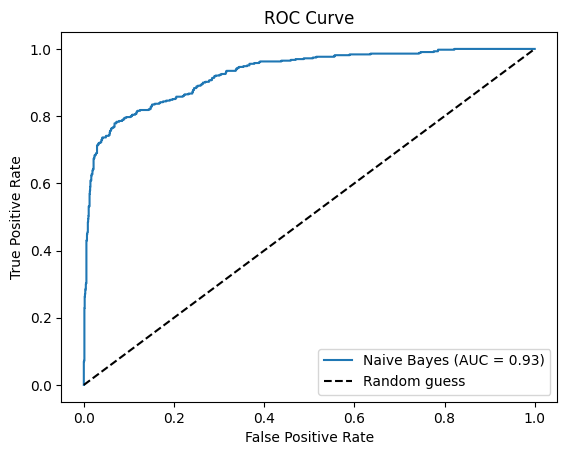

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
print('Prior probability for the negative class is',)
print(np.exp(model.class_log_prior_[0]))
print('Prior probability for the positive class is',)
print(np.exp(model.class_log_prior_[1]))

Prior probability for the negative class is
0.7855000000000002
Prior probability for the positive class is
0.21450000000000002


In [ ]:
train_df['target'].value_counts() / len(train_df)

,count
target,
0,0.7855
1,0.2145


In [ ]:
model.feature_log_prob_[1][:5]
print('Likelihoods for the negative class (first 5 features)')
print(np.exp(model.feature_log_prob_[0])[:5])
print('Likelihoods for the positive class (first 5 features)')
print(np.exp(model.feature_log_prob_[1])[:5])

Likelihoods for the negative class (first 5 features)
[0.0302194  0.02634766 0.03131143 0.03087462 0.00611536]
Likelihoods for the positive class (first 5 features)
[0.00578829 0.01989726 0.0018812  0.00332827 0.09362564]


In [ ]:
feature_importances = abs(model.feature_log_prob_[1] - model.feature_log_prob_[0])
feature_importances

array([1.65264659e+00, 2.80797622e-01, 2.81207573e+00, 2.22748211e+00,
       2.72850101e+00, 8.95005582e-01, 1.02272300e+00, 3.27740664e-01,
       6.87894154e-01, 8.67615416e-01, 9.53388312e-01, 1.05650272e+00,
       1.00947778e+00, 8.59637429e-01, 6.92119938e-01, 7.68315721e-01,
       1.17560140e+00, 1.35496685e-01, 6.10443560e-01, 1.80817044e-01,
       5.31968064e-02, 2.58343340e-01, 2.64348853e-01, 1.74572323e-01,
       6.76390467e-03, 8.74896402e-04, 4.74718597e-02, 1.56343260e-01,
       2.27137897e-02, 2.34092499e-01, 4.72249108e-02, 3.76816583e-01,
       7.50815427e-02, 6.23815297e-01, 2.54455194e-01, 9.31425318e-02,
       1.33116541e-01, 2.18350189e-01, 2.59033547e-01, 1.83929857e+00,
       6.32506909e-01, 1.90381487e-01, 3.57833548e-01, 1.66083209e+00,
       1.02576787e-01, 3.83021972e-01, 7.26052085e-02, 3.46893248e-01,
       1.68581784e+00, 8.41122191e-01, 8.51274562e-01, 3.71900449e-01,
       3.12278062e-01, 1.00542524e+00, 5.29755876e-01, 8.87642207e-01,
      

In [ ]:
feature_importance_series = Series(feature_importances, index=X.columns.values)
feature_importance_series[:10]

,0
"amt_binned_(0.999, 9.108]",1.652647
"amt_binned_(9.108, 38.9]",0.280798
"amt_binned_(38.9, 75.5]",2.812076
"amt_binned_(75.5, 183.014]",2.227482
"amt_binned_(183.014, 8517.38]",2.728501
category_entertainment,0.895006
category_food_dining,1.022723
category_gas_transport,0.327741
category_grocery_net,0.687894
category_grocery_pos,0.867615


In [ ]:
feature_importance_series.sort_values(ascending=False)[:10]

,0
state_WV,3.407373
state_UT,2.926400
state_VT,2.817767
"amt_binned_(38.9, 75.5]",2.812076
"amt_binned_(183.014, 8517.38]",2.728501
"amt_binned_(75.5, 183.014]",2.227482
state_NV,2.002730
is_night_0,1.839299
state_CO,1.685818
state_AK,1.660832


In [ ]:
top_10_feature_indices = feature_importance_series.sort_values(ascending=False)[:10].index.values

Log odds ratio of feature occurent between two classes. The important features happen more often in class 1 (default) than in class 0 (non-default) so they are
all positive. This means that the features that best distinguish defaults
from non-defaults are all more common in defaults. The predictors might not
be good for not default. This might also be a consequence of unbalanced data.

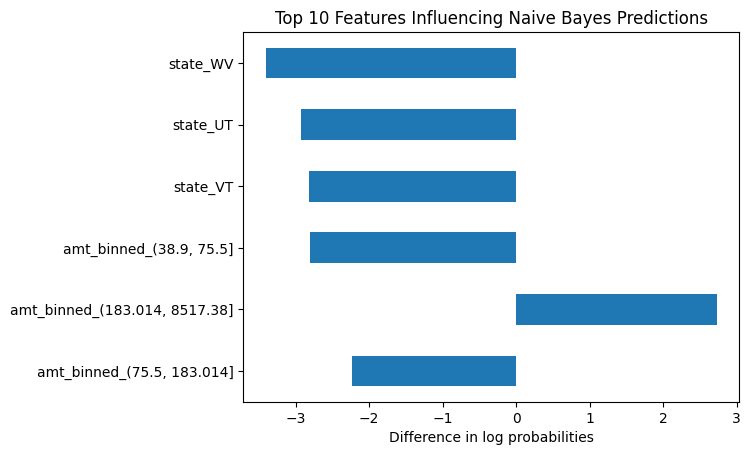

In [ ]:
inter_class_differences = model.feature_log_prob_[1] - model.feature_log_prob_[0]
new_feature_importance_series = Series(inter_class_differences, index=X.columns.values)
new_feature_importance_series
new_feature_importance_series.loc[top_10_feature_indices][:6].plot(kind='barh')
plt.xlabel('Difference in log probabilities')
plt.title('Top 10 Features Influencing Naive Bayes Predictions')
plt.gca().invert_yaxis()
plt.show()

These are the non-default heavy predictors with big enough values to show that
our analysis is "healthy" as we also have strong predictors for non-default.

In [ ]:
new_feature_importance_series.nsmallest(10)

,0
state_WV,-3.407373
state_UT,-2.926400
state_VT,-2.817767
"amt_binned_(38.9, 75.5]",-2.812076
"amt_binned_(75.5, 183.014]",-2.227482
state_NV,-2.002730
is_night_0,-1.839299
state_CO,-1.685818
"amt_binned_(0.999, 9.108]",-1.652647
state_WY,-1.520303


In [ ]:
pd.cut(selected_cols_df['age'], bins=5, include_lowest=True).unique()

[(40.4, 56.6], (24.2, 40.4], (56.6, 72.8], (7.917999999999999, 24.2], (72.8, 89.0]]
Categories (5, interval[float64, right]): [(7.917999999999999, 24.2] < (24.2, 40.4] < (40.4, 56.6] <
                                           (56.6, 72.8] < (72.8, 89.0]]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test)

# Print raw confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1505   66]
 [ 113  316]]


In [ ]:
(316+1505)/(113+316+1505+66)

0.9105